# Classification problem

In this notebook we will visualize the effect of hyperparameters on the classification process.

The algorithm used is "K Nearest Neighbors" 

K Nearest Neighbors explained

![image.png](./knn.png)

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import datasets
from KNN_iris import KNN_plot

Loading the dataset

In [2]:
# Loading the dataset
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# Overlook on the dataset
print "Number of features: ", iris_X.shape[1]
print "Labels: ", np.unique(iris_y)

Number of features:  4
Labels:  [0 1 2]


Fitting the model

In [14]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
def fit_test(n):
    knn = KNeighborsClassifier(n)
    knn.fit(iris_X_train, iris_y_train) 
    print 'True Label:      ', iris_y_test
    print 'Predicted Label: ', knn.predict(iris_X_test)


The number of neighbors K is our hyperparameter

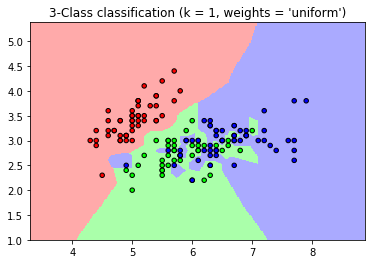

True Label:       [1 1 1 0 0 0 2 1 2 0]
Predicted Label:  [1 2 1 0 0 0 2 1 2 0]


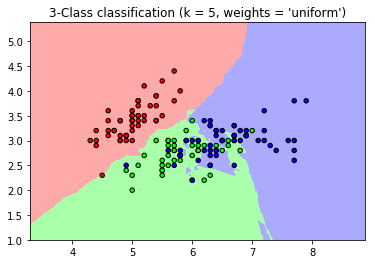

True Label:       [1 1 1 0 0 0 2 1 2 0]
Predicted Label:  [1 2 1 0 0 0 2 1 2 0]


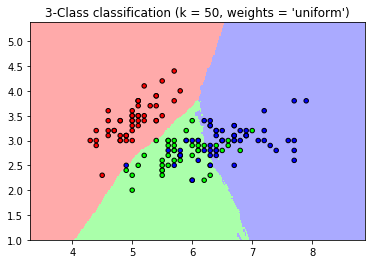

True Label:       [1 1 1 0 0 0 2 1 2 0]
Predicted Label:  [1 1 1 0 0 0 2 1 2 0]


In [16]:
n_neighbors = [1, 5, 50]
for i in n_neighbors:    
    KNN_plot(i)
    fit_test(i)

Pros of KNN:
    
    1) No assumptions about data — useful, for example, for nonlinear data
    
    2) Simple algorithm — to explain and understand/interpret
    
    3) Good with outlyers as we increase the number of neighbors
    
Cons of KNN:
    
    1) Computationally expensive — because the algorithm stores all of the training data
    
    2) High memory requirement
    
    3) Data must be scaled!
    
    4) Prediction stage might be slow with big N

NB: The visualization is done on the plane (x, y) where x is the first feature, and y the second features ( X[:,0] and X[:,1] ).

However, the algorithm KNN is calculating the distances using all the features. Any two other features could have been chosen.

In notebook KNN_advanced, we will work with more hyperparameters and use different features.